In [143]:
import copy
import warnings
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt
from   scipy.stats       import probplot, kstest

In [144]:
from sklearn.exceptions import FitFailedWarning,ConvergenceWarning
warnings.filterwarnings('ignore',category=FitFailedWarning)
warnings.filterwarnings('ignore',category=ConvergenceWarning)
warnings.filterwarnings('ignore',category=UserWarning)

In [145]:
data = pd.read_csv('datasets/HousePricePredictionRegression/data.csv',sep=',')

In [146]:
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


&nbsp;

## Analise dos dados

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [148]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


> Features passaram por normalização|padronização

In [149]:
data.isna().nunique()

date             1
price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
street           1
city             1
statezip         1
country          1
dtype: int64

> Não há valores nulos no conj. de dados

## Analisando cada coluna cada colunas

### Colunas categoricas

In [150]:
# Atributos que são categoricos
data.select_dtypes(exclude=[int, float]).columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

#### Country

In [151]:
data['country'].nunique()

1

In [152]:
data['country'].value_counts().reset_index()

,country,count
0,USA,4600


> O atributos country é redundante pois só há um valor único será removido no pré-processamento

#### Cities

In [153]:
data['city'].nunique()

44

> Há muitos valores será feito a correlação entre target e essa coluna

### StateZip

In [154]:
data['statezip'].nunique()

77

### street

In [155]:
data['street'].nunique()

4525

### Date

In [156]:
data['date'].nunique()

70

> Esse atributo não será utilizado para a Regressão 

In [157]:
data['date'] = pd.to_datetime(data['date'])

Verificando a serie historica da media de precos de

In [158]:
subset = data[['date','price']]

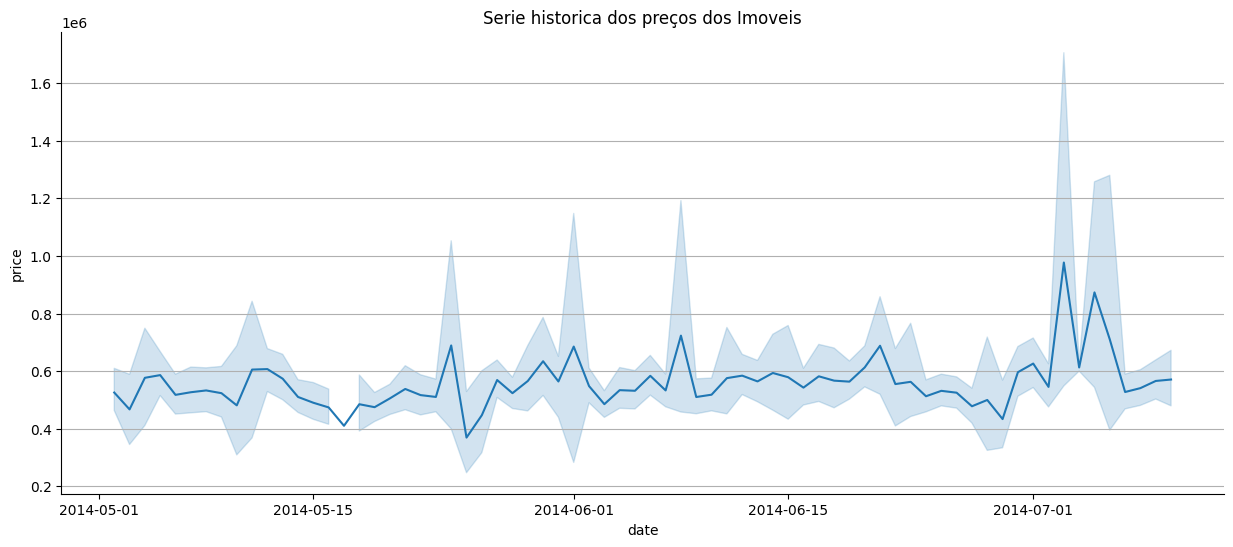

In [159]:
plt.figure(figsize=(15, 6))
plt.title('Serie historica dos preços dos Imoveis')
sea.lineplot(subset, x='date', y='price')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().grid(True, axis='y')
plt.show()

> **Obs**:No futuro irei utilizar series temporais para resolver esse problema...

### Analisando price

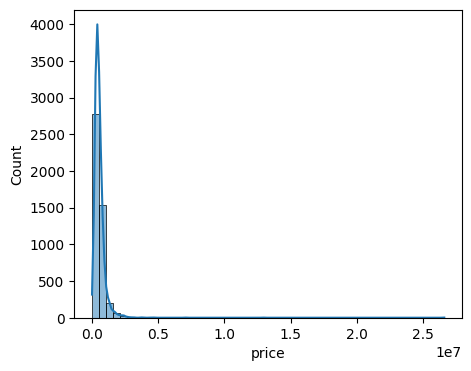

In [160]:
plt.figure(figsize=(5,4))
sea.histplot(data['price'], kde=True, bins=50)
plt.show()

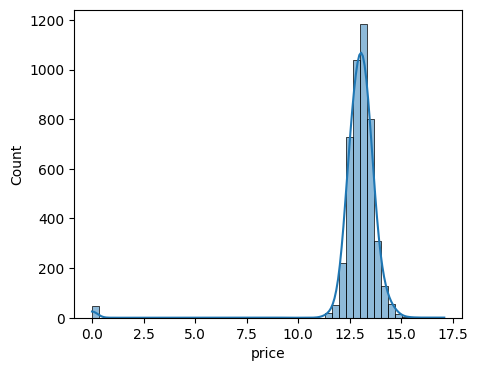

In [161]:
plt.figure(figsize=(5,4))
sea.histplot(np.log1p(data['price']), kde=True, bins=50)
plt.show()

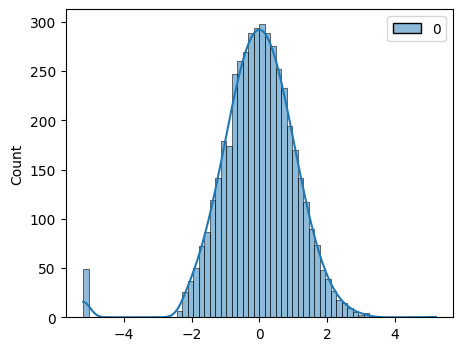

In [162]:
from sklearn.preprocessing import QuantileTransformer

a = QuantileTransformer(output_distribution='normal',random_state=32).fit_transform(data['price'].values.reshape(-1,1))

plt.figure(figsize=(5,4))
sea.histplot(a, kde=True)
plt.show()

> O atributo alvo passar por um uma transformação `QuantileTransformer`

Verificando se o atributo price seguem uma normal

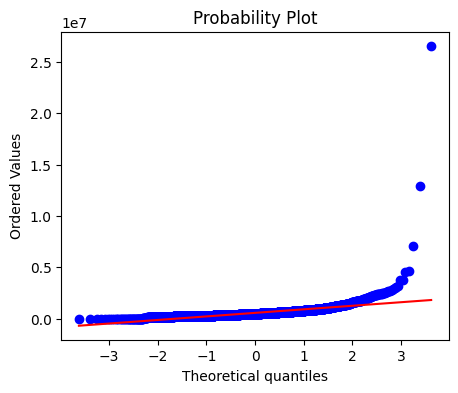

In [163]:
plt.figure(figsize=(5,4))
probplot(data['price'], dist='norm', plot=plt)
plt.show()

In [164]:
print(kstest(data['price'], 'norm')[:2])

(0.9893478260869565, 0.0)


> Dados não seguem uma normal pois o p-valor < 0.05 ( se rejeita $H_0$)

In [165]:
data['price'].min()

0.0

In [166]:
data.loc[data['price']<=0].shape

(49, 18)

> **Dados Incosistente**:Não faz sentido uma pessoa vender um imovel de graça será removido do conj. dados

### Para Sqrt_living|above e year_build verificando se esse atributos seguem uma normal

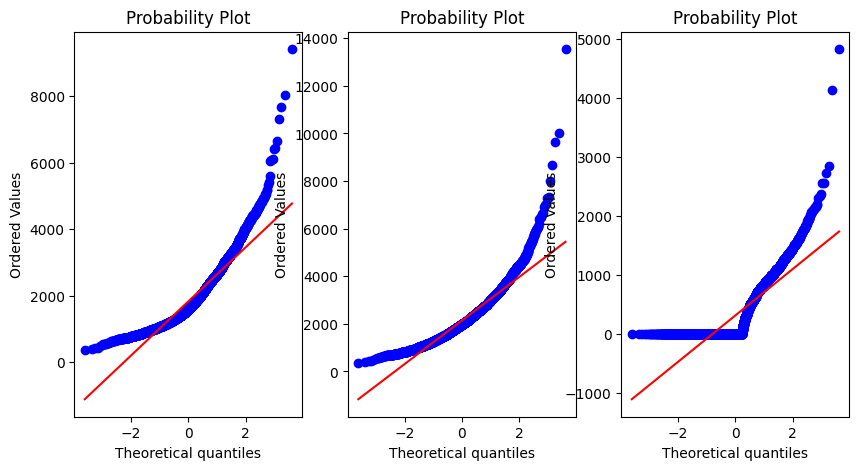

In [167]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
probplot(data['sqft_above' ], dist='norm', plot=ax[0])
probplot(data['sqft_living'], dist='norm', plot=ax[1])
probplot(data['sqft_basement'], dist='norm', plot=ax[2])

plt.show()

> Não seguem uma normal

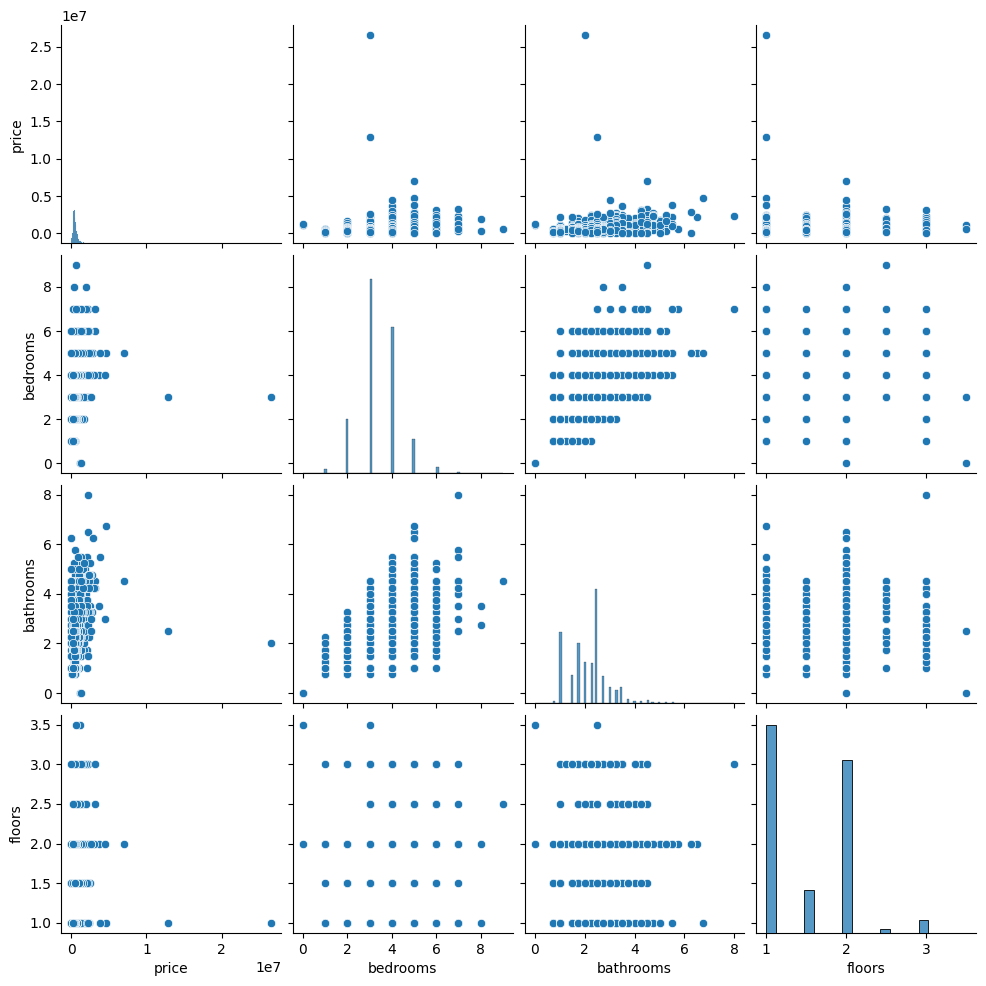

In [168]:
sea.pairplot(data.select_dtypes(exclude=['object','int']))
plt.show()

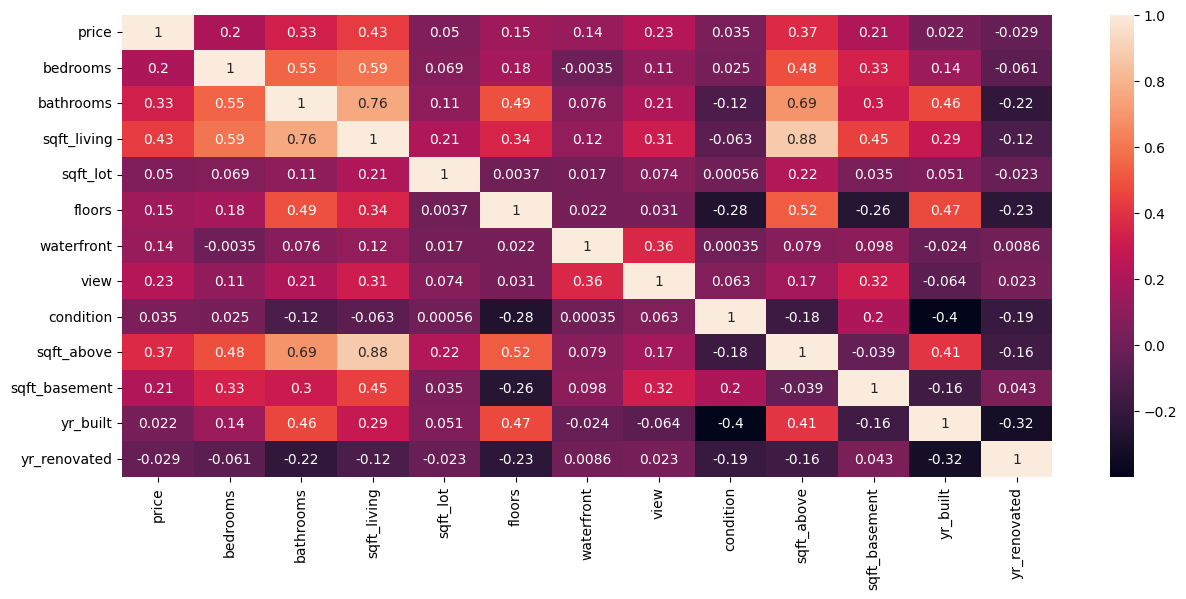

In [169]:
plt.figure(figsize=(15,6))
sea.heatmap(data.select_dtypes(exclude=['object','datetime']).corr(),annot=True)
plt.show()

> O `target` possue muitas `features` correlacionadas , contudo, existem algumas que não são no caso do atributo `yr_renovated` 

A classe irá dar correlação entre valores categoricos e valores numericos

In [170]:
from scipy.stats import  pointbiserialr
from scipy.stats.contingency import chi2_contingency, association
from sklearn.preprocessing   import LabelEncoder
class Correlation:
    M_ = None

    def __init__(self, column1:list, column2:list, data:pd.DataFrame):
        self.column_names1 = column1
        self.column_names2 = column2
        self.data          = data
        self.tupla         = ( len(column1) , len(column2) )
        self.M_ = np.zeros(shape=self.tupla)

    def Encoder(self, X):
        return LabelEncoder().fit_transform(X)
    def pointBisserl(self):

        for enum_i, i in enumerate(self.column_names1):
            for enum_j, j in enumerate(self.column_names2):

                values_i = self.data[i].values
                values_j = self.data[j].values

                if values_i.dtype=='object':
                    values_i =  self.Encoder(values_i)
                if values_j.dtype=='object':
                    values_j =  self.Encoder(values_j)

                corr, _ = pointbiserialr(values_i, values_j)
                self.M_[enum_i, enum_j] = corr

        return pd.DataFrame(
            data    = self.M_.T,
            columns = self.column_names1,
            index   = self.column_names2
        )

In [171]:
cat = data.select_dtypes(exclude=['int','float','datetime64[ns]']).columns[:3].tolist()
cat

['street', 'city', 'statezip']

In [172]:
Correlation(cat, ['price'], data).pointBisserl()

,street,city,statezip
price,0.029366,0.018625,-0.043385


> Os atributos categoricos tem baixa relação com os preços então será removido no pre-processamento

&nbsp;

## Pré-processamento

Essas classes serão usada para o pre-processamento, automatizo o processo e facilito quando eu quiser rodar denovo.
Usarei o BaseEstimator,TransformerMixin para criar as classe que serão utilizadas na pipeline

In [173]:
from sklearn.base          import BaseEstimator,TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

A classe abaixo remove atributos do conj. dados, a classe recebe como parametro as colunas que deseja remover

In [174]:
class RemovendoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.drop(columns=self.columns,axis=0)

Essa classe criava uma coluna que dava a idade da casa , contudo, esse atributo não tinha uma grande correlação com o atributo alvo(`target`), mantive ela para mostrar os erros

In [175]:
class CriandoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.columns = ['date','yr_built','yr_renovated']

    def fit(self,X,y=None):
        return self

    def transform(self,X:pd.DataFrame,y=None):

        X[self.columns[0]] = pd.to_datetime(X[self.columns[0]])
        X['YearHouse' ] = X[self.columns[0]].dt.year - abs( X[self.columns[1]] )
        return X

Passa dados categoricos para numericos

In [176]:
class TransformandoAtributos(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list|str):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        if (type(self.columns) == list):
            X[self.columns] = LabelEncoder().fit_transform(X[self.columns])
        else:
            X[self.columns] = LabelEncoder().fit_transform(X[self.columns].values)
        return X

Classe abaixo padroniza os atributos numericos

In [177]:
class Padronizacao(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self, X:pd.DataFrame):
        if ( type(self.columns) == list ):
            X[self.columns]   = StandardScaler().fit_transform(X[self.columns])
        else:
            X[[self.columns]] = StandardScaler().fit_transform(X[[self.columns]])
        return X

In [178]:
class Teto(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self, X:pd.DataFrame):
        for column in self.columns:
            X[column] = np.floor(X[column].values)
        return X

Faz o dummies de atributos categoricos ordinal nesse caso eu uso o `pd.get_dummies` ao inves do OneHotEncoder do Sklearn, pois mantém a estrutura de `pd.DataFrame` do pandas

In [179]:
class Dummies(BaseEstimator,TransformerMixin):
    def __init__(self,columns:list | str) -> None:
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self, X:pd.DataFrame):
        return pd.get_dummies(X,columns=self.columns,dtype=int)

Remove dados incosistente e recebe como parametro o indice que tem esses dados

In [180]:
class DadosIncosistente(BaseEstimator,TransformerMixin):
    def __init__(self,index:list) -> None:
        self.self.index = index

    def fit(self,X,y=None):
        return self

    def transform(self, X:pd.DataFrame):
        X.drop(index=self.index, inplace=True)
        return X


Target passará por uma transformação logaritmica

In [181]:
class TransformancaoTarget(BaseEstimator,TransformerMixin):
    def __init__(self, column, dtype=1):
        self.column = column
        self.dtype  = dtype

    def fit(self,X,y=None):
        return self

    def transform(self,X:pd.DataFrame,y=None):
        X = X.drop(index=X.loc[X[self.column]==0].index,axis=1)

        if self.dtype == 1:
            X['price'] = np.log1p(X[self.column])
        else:
            transformation = QuantileTransformer(output_distribution='normal', random_state=42)
            X['price']= transformation.fit_transform(X['price'].values.reshape(-1,1))


        return X

> Porque o atributo alvo será transformacao logaritma|normal pois há uma ganho na representatividade dos dados e aumento da pontuação das metricas como `R2-score`

> Me decisão toma como base os sites abaixo que falam sobre isso:
* [Geek for Geek](https://www.geeksforgeeks.org/effect-of-transforming-the-targets-in-regression-model/)

* [SkLearn](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-download-auto-examples-compose-plot-transformed-target-py)


## Previsão

In [182]:
train = pd.read_csv('datasets/HousePricePredictionRegression/data.csv')
test  = pd.read_csv('datasets/HousePricePredictionRegression/output.csv')

In [183]:
from sklearn.metrics      import *
from sklearn.pipeline     import Pipeline
from sklearn.linear_model import SGDRegressor,LinearRegression,Ridge,ElasticNet
from sklearn.svm          import SVR
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import VotingRegressor, GradientBoostingRegressor
from sklearn.base         import clone
from sklearn.model_selection import (
    StratifiedShuffleSplit,
    train_test_split,
    cross_val_score ,
    GroupKFold      ,
    GridSearchCV    ,
    KFold
)

Pipeline de pré-processamento de dados

In [184]:
pipeline = Pipeline(
    steps=[
        ('Tranformacao Log',
            TransformancaoTarget('price', 0),
         ),
        ('Padronização'        ,
            Padronizacao([
                'sqft_living','sqft_lot',
                'sqft_above','sqft_basement'])),
        ('RemovendoAtributos'  ,
            RemovendoAtributos([
                'country','street',
                'statezip','date',
                'yr_built','yr_renovated'])),
        ('Teto'                ,
            Teto(['bathrooms','floors'])),
        ('Dummies'             ,
            Dummies(['bedrooms','bathrooms',
                     'waterfront','view',
                     'condition','city',
                     'floors']))
        ]
)

In [185]:
pipeline

Pipeline(steps=[('Tranformacao Log',
                 TransformancaoTarget(column='price', dtype=0)),
                ('Padronização',
                 Padronizacao(columns=['sqft_living', 'sqft_lot', 'sqft_above',
                                       'sqft_basement'])),
                ('RemovendoAtributos',
                 RemovendoAtributos(columns=['country', 'street', 'statezip',
                                             'date', 'yr_built',
                                             'yr_renovated'])),
                ('Teto', Teto(columns=['bathrooms', 'floors'])),
                ('Dummies',
                 Dummies(columns=['bedrooms', 'bathrooms', 'waterfront', 'view',
                                  'condition', 'city', 'floors']))])

In [186]:
dataset = pipeline.fit_transform(train)
test_dt = pipeline.fit_transform(test)

In [187]:
dataset.corrwith(dataset['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.660493
sqft_above       0.574769
sqft_basement    0.303656
bathrooms_3.0    0.299359
                   ...   
city_Auburn     -0.201449
bedrooms_2.0    -0.202391
view_0          -0.302949
floors_1.0      -0.303217
bathrooms_1.0   -0.399723
Length: 82, dtype: float64

In [188]:
X = dataset.drop(columns='price',axis=0)
Y = dataset['price']

In [189]:
xtrain , xtest , ytrain , ytest = train_test_split(X, y,test_size=0.25,random_state=42)

&nbsp;

### Gradiente descendente estocastico regressor

In [190]:
regSGB = SGDRegressor()
regSGB.fit(xtrain,ytrain)

SGDRegressor()

In [191]:
predSGB = regSGB.predict(xtest)

In [192]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predSGB))
print("Mean Squared error...:",mean_squared_error(ytest,predSGB))
print("r2 score.............:",r2_score(ytest,predSGB))

Mean Absolute error..: 0.39532522998368164
Mean Squared error...: 0.3227171942218221
r2 score.............: 0.6756000523346681


In [193]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1

for train,test in kfold.split(X,Y):
    foldreg = clone(regSGB)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.58125 | mean_absolute_error: 0.391599 | r2 : 0.6669662031904544
Fold 2 | mean_squared_error : 0.56225 | mean_absolute_error: 0.396002 | r2 : 0.6719102391400358
Fold 3 | mean_squared_error : 0.54865 | mean_absolute_error: 0.388587 | r2 : 0.7062984386941132
Fold 4 | mean_squared_error : 0.55754 | mean_absolute_error: 0.393228 | r2 : 0.6919287649631229
Fold 5 | mean_squared_error : 0.52657 | mean_absolute_error: 0.379274 | r2 : 0.7274815858444


In [194]:
scores =cross_val_score(clone(regSGB),X,Y,cv=kfold,scoring='r2')
print('cross_val_score_mean...:',scores.mean())

cross_val_score_mean...: 0.6924571014399278


&nbsp;

### Gradiente boost

In [195]:
tree = DecisionTreeRegressor()
tree.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [196]:
print('profundidade :', tree.get_depth())
print('folhas :', tree.get_n_leaves())

profundidade : 39
folhas : 3369


In [197]:
random = np.random.RandomState(seed=42)
params = dict(
    criterion= ['squared_error', 'poisson'],
    splitter = ['best', 'random'],
    max_depth= random.randint(30, 38, 6),
    min_samples_split = [50, 100, 200],
    max_features      = ['sqrt', 'log2']
)
grid_tree = GridSearchCV(
    estimator=DecisionTreeRegressor(), param_grid= params,
    scoring='neg_root_mean_squared_error'
)
grid_tree.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': array([36, 33, 34, 36, 32, 37]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [50, 100, 200],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [198]:
print('Melhor estimador :' , grid_tree.best_estimator_)
print('Melhor estimador :' , -1*grid_tree.best_score_)

Melhor estimador : DecisionTreeRegressor(max_depth=32, max_features='sqrt', min_samples_split=50,
                      splitter='random')
Melhor estimador : 0.6670461658922645


In [199]:
grad_boost = GradientBoostingRegressor(
    max_depth=33, max_features='log2', min_samples_split=50
)
grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=33, max_features='log2',
                          min_samples_split=50)

In [200]:
pred = grad_boost.predict(xtest)

In [201]:
print("Mean Absolute error..:",mean_absolute_error(ytest,pred))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,pred)))
print("r2 score.............:",r2_score(ytest,pred))

Mean Absolute error..: 0.38202660725798193
Mean Squared error...: 0.555351166001345
r2 score.............: 0.6899769057452743


Fazendo validação cruzada

In [202]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(grad_boost)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | R2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.56774 | mean_absolute_error: 0.383022 | R2 : 0.6822654017019818
Fold 2 | mean_squared_error : 0.55006 | mean_absolute_error: 0.379180 | R2 : 0.68597597285006
Fold 3 | mean_squared_error : 0.53641 | mean_absolute_error: 0.373660 | R2 : 0.7192519882304269
Fold 4 | mean_squared_error : 0.52713 | mean_absolute_error: 0.374402 | R2 : 0.7246178809581016
Fold 5 | mean_squared_error : 0.52398 | mean_absolute_error: 0.375670 | R2 : 0.7301608454486441


In [203]:
scores =cross_val_score(clone(grad_boost),X,y,cv=kfold,scoring='r2')
print('cross_val_score_mean..:',scores.mean())

cross_val_score_mean..: 0.7042990809202527


&nbsp;

### SVM

In [204]:
svmr = SVR(kernel='poly',degree=2,coef0=10)
svmr.fit(xtrain,ytrain)

SVR(coef0=10, degree=2, kernel='poly')

In [205]:
predSVMR = svmr.predict(xtest)

In [206]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predSVMR))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predSVMR)))
print("r2 score.............:",r2_score(ytest,predSVMR))

Mean Absolute error..: 0.34925074763447483
Mean Squared error...: 0.5384591250944332
r2 score.............: 0.7085499374475048


In [207]:
scores =cross_val_score(clone(svmr),X,Y,cv=kfold,scoring='r2')
print('cross_val_score_mean..:',scores.mean())

cross_val_score_mean..: 0.7325343892438113


&nbsp;

### Ridge

In [208]:
params = dict(
    alpha  = np.linspace(1,1.9,8),
    solver = ['svd', 'cholesky']
)
gridRidge = GridSearchCV(estimator=Ridge(),param_grid=params,scoring='neg_mean_absolute_error')
gridRidge.fit(xtrain,ytrain)

print(gridRidge.best_estimator_)
print(gridRidge.best_score_)

Ridge(solver='cholesky')
-0.3730656568315335


In [209]:
ridge = gridRidge.best_estimator_
ridge.fit(xtrain,ytrain)

Ridge(solver='cholesky')

In [210]:
predRidge = ridge.predict(xtest)

In [211]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predRidge))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predRidge)))
print("r2 score.............:",r2_score(ytest,predRidge))

Mean Absolute error..: 0.3722624980397567
Mean Squared error...: 0.5577420151811029
r2 score.............: 0.6873017912574857


In [212]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(ridge)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.57170 | mean_absolute_error: 0.372444 | r2 : 0.6778261354192492
Fold 2 | mean_squared_error : 0.55287 | mean_absolute_error: 0.384812 | r2 : 0.6827663012065828
Fold 3 | mean_squared_error : 0.53406 | mean_absolute_error: 0.372955 | r2 : 0.7217097278363842
Fold 4 | mean_squared_error : 0.53793 | mean_absolute_error: 0.373812 | r2 : 0.7132239764632715
Fold 5 | mean_squared_error : 0.49912 | mean_absolute_error: 0.356209 | r2 : 0.7551583053947761


In [213]:
scores = cross_val_score(clone(ridge),X,Y,cv=kfold,scoring='r2')
print('cross_val_score_mean..:',scores.mean())

cross_val_score_mean..: 0.7101368892640527


> Está generalizando bem

&nbsp;

### Elastic net

In [214]:
params = dict(
    alpha    = np.linspace(0.0001,0.1,10),
    l1_ratio = np.linspace(0.1,0.9,9)
)
gridElastic = GridSearchCV(ElasticNet(),param_grid=params,scoring='neg_mean_absolute_error')
gridElastic.fit(xtrain,ytrain)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.0001, 0.0112, 0.0223, 0.0334, 0.0445, 0.0556, 0.0667, 0.0778,
       0.0889, 0.1   ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [215]:
elastic = gridElastic.best_estimator_
elastic.fit(xtrain,ytrain)

ElasticNet(alpha=0.0001, l1_ratio=0.9)

In [216]:
predElastic = elastic.predict(xtest)

In [217]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predElastic))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predElastic)))
print("r2 score.............:",r2_score(ytest,predElastic))

Mean Absolute error..: 0.372215938820456
Mean Squared error...: 0.5608732368953917
r2 score.............: 0.683780895014686


In [218]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(elastic)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.57532 | mean_absolute_error: 0.372930 | r2 : 0.6737257366436052
Fold 2 | mean_squared_error : 0.55356 | mean_absolute_error: 0.385256 | r2 : 0.6819727608821257
Fold 3 | mean_squared_error : 0.53459 | mean_absolute_error: 0.373070 | r2 : 0.7211598475397676
Fold 4 | mean_squared_error : 0.53808 | mean_absolute_error: 0.373170 | r2 : 0.7130547560208245
Fold 5 | mean_squared_error : 0.49871 | mean_absolute_error: 0.355826 | r2 : 0.7555594075672033


In [219]:
scores =cross_val_score(clone(elastic),X,Y,cv=kfold,scoring='r2')
print('cross_val_score.......:',scores)
print('cross_val_score_mean..:',scores.mean())

cross_val_score.......: [0.67372574 0.68197276 0.72115985 0.71305476 0.75555941]
cross_val_score_mean..: 0.7090945017307052


### Rede Neural pytorch

In [220]:
from torch import nn
from torch.nn import functional as f 
from torch.utils.data import TensorDataset, DataLoader

### Melhores
1. Reg
3. SVM
2. SGB Elastic

In [221]:
regressor = VotingRegressor(
    estimators = [
        ('sgb',regSGB),
        ('svm',svmr),
        ('ridge',ridge),
        ('elastic',elastic)
    ]
)
regressor.fit(xtrain,ytrain)

VotingRegressor(estimators=[('sgb', SGDRegressor()),
                            ('svm', SVR(coef0=10, degree=2, kernel='poly')),
                            ('ridge', Ridge(solver='cholesky')),
                            ('elastic',
                             ElasticNet(alpha=0.0001, l1_ratio=0.9))])

In [222]:
predVoting = regressor.predict(xtest)

In [223]:
print("Mean Absolute error..:",mean_absolute_error(ytest,predVoting))
print("Mean Squared error...:",np.sqrt(mean_squared_error(ytest,predVoting)))
print("r2 score.............:",r2_score(ytest,predVoting))

Mean Absolute error..: 0.3589316022925214
Mean Squared error...: 0.5342063502813817
r2 score.............: 0.7131355289120784


In [224]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = clone(regressor)
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    foldreg.fit(xtrainkf,ytrainkf)
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

Fold 1 | mean_squared_error : 0.54676 | mean_absolute_error: 0.359900 | r2 : 0.7053127987604683
Fold 2 | mean_squared_error : 0.53873 | mean_absolute_error: 0.372655 | r2 : 0.6987847425984073
Fold 3 | mean_squared_error : 0.52349 | mean_absolute_error: 0.361731 | r2 : 0.7326112353985456
Fold 4 | mean_squared_error : 0.52650 | mean_absolute_error: 0.363718 | r2 : 0.7252735923870309
Fold 5 | mean_squared_error : 0.48849 | mean_absolute_error: 0.347806 | r2 : 0.7654699394987516


## Rede neural

In [225]:
import keras
import tensorflow as tf
from   functools import partial

2024-05-28 15:41:33.985185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 15:41:33.985229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 15:41:33.999240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-28 15:41:34.032505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 15:41:35.438617: W tensorflow/compiler/tf2

In [256]:
xtrain.shape[0]//30, xtrain.shape

(113, (3413, 81))

In [270]:
def Model():
    Dense = partial(
        keras.layers.Dense,
        
        kernel_initializer = keras.initializers.he_normal,
    )

    model = keras.models.Sequential(
        layers=[
            Dense(160, use_bias=False),
            keras.layers.BatchNormalization(),
            keras.layers.ELU(),
                      
            Dense(80, use_bias=False),
            keras.layers.BatchNormalization(),
            keras.layers.ELU(),
            keras.layers.Dropout(rate=0.1),

            Dense(40, use_bias=False),
            keras.layers.BatchNormalization(),
            keras.layers.ELU(),
            keras.layers.Dropout(rate=0.1),
            
            Dense(20, use_bias=False),
            keras.layers.BatchNormalization(),
            keras.layers.ELU(),

            keras.layers.Dropout(rate=0.1),
            Dense(10, use_bias=False),
            keras.layers.BatchNormalization(),
            keras.layers.ELU(),

            Dense(5, use_bias=False),
            keras.layers.BatchNormalization(),
            keras.layers.ELU(),

            Dense(3, use_bias=False),
            keras.layers.BatchNormalization(),
            keras.layers.ELU(),

            keras.layers.Dense(1, kernel_initializer=keras.initializers.he_normal)
        ]
    )
    return model

In [278]:
model = Model()

model.compile(
    optimizer=keras.optimizers.RMSprop(momentum=0.99 , clipnorm=2),
    loss=keras.losses.MAE,
)
stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(xtrain, ytrain, batch_size=10, epochs=20, callbacks=[stopping])

Epoch 1/20
342/342 [==============================] - 5s 6ms/step - loss: 0.5920
Epoch 2/20
342/342 [==============================] - 2s 6ms/step - loss: 0.5449
Epoch 3/20
342/342 [==============================] - 2s 5ms/step - loss: 0.5288
Epoch 4/20
342/342 [==============================] - 2s 5ms/step - loss: 0.5042
Epoch 5/20
342/342 [==============================] - 2s 6ms/step - loss: 0.5029
Epoch 6/20
342/342 [==============================] - 2s 5ms/step - loss: 0.5183
Epoch 7/20
342/342 [==============================] - 2s 6ms/step - loss: 0.4960
Epoch 8/20
342/342 [==============================] - 2s 6ms/step - loss: 0.4779
Epoch 9/20
342/342 [==============================] - 2s 6ms/step - loss: 0.4934
Epoch 10/20
342/342 [==============================] - 2s 6ms/step - loss: 0.5424
Epoch 11/20
342/342 [==============================] - 2s 6ms/step - loss: 0.4975


In [282]:
pred = model.predict(xtest)

36/36 [==============================] - 0s 1ms/step


In [283]:
print("Mean Absolute error..:",mean_absolute_error(ytest,pred))
print("Mean Squared error...:",mean_squared_error(ytest,pred))
print("r2 score.............:",r2_score(ytest,pred))

Mean Absolute error..: 0.3819274785212625
Mean Squared error...: 0.30410289979016997
r2 score.............: 0.6943114078111429


In [281]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
index = 1
for train,test in kfold.split(X,Y):
    foldreg = model
    xtrainkf , xtestkf = X.iloc[train],X.iloc[test]
    ytrainkf , ytestkf = Y.iloc[train],Y.iloc[test]

    stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

    foldreg.fit(xtrain, ytrain, batch_size=10, epochs=20, verbose=0, callbacks=[stopping])
    predfold = foldreg.predict(xtestkf)
    squared  = np.sqrt(mean_squared_error(ytestkf,predfold))
    absolute = mean_absolute_error(ytestkf,predfold)
    print(f'Fold {index} | mean_squared_error : {squared:.5f} | mean_absolute_error: {absolute:5f} | r2 : {r2_score(ytestkf,predfold)}')
    index+=1

29/29 [==============================] - 0s 3ms/step
Fold 1 | mean_squared_error : 0.67977 | mean_absolute_error: 0.509519 | r2 : 0.5445072446511884
29/29 [==============================] - 0s 4ms/step
Fold 2 | mean_squared_error : 0.57840 | mean_absolute_error: 0.416193 | r2 : 0.6527947238807261
29/29 [==============================] - 0s 3ms/step
Fold 3 | mean_squared_error : 0.53247 | mean_absolute_error: 0.381751 | r2 : 0.723358435312512
29/29 [==============================] - 0s 3ms/step
Fold 4 | mean_squared_error : 0.51894 | mean_absolute_error: 0.360274 | r2 : 0.7331097193375834
29/29 [==============================] - 0s 1ms/step
Fold 5 | mean_squared_error : 0.47857 | mean_absolute_error: 0.345841 | r2 : 0.7749043303048717


> Modelo se saiu bem
